In [ ]:
#LEVEL2 

In [ ]:
#TASK2:Table Booking and Online Delivery

In [9]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as pt  
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')


In [10]:
data = pd.read_csv(r"C:\Users\8saik\Downloads\dataset.csv")


In [17]:
total_restaurants = len(data)

# Percentage calculation
table_booking_percentage = (data['Has Table booking'] == 'Yes').sum() / total_restaurants * 100
online_delivery_percentage = (data['Has Online delivery'] == 'Yes').sum() / total_restaurants * 100

# Display results
print(f"Percentage of restaurants offering Table Booking: {table_booking_percentage:.2f}%")
print(f"Percentage of restaurants offering Online Delivery: {online_delivery_percentage:.2f}%")

Percentage of restaurants offering Table Booking: 12.12%
Percentage of restaurants offering Online Delivery: 25.66%


In [18]:
#Average Ratings of restaurants with and without table booking 

In [19]:
avg_rating_with_table = data[data['Has Table booking'] == 'Yes']['Aggregate rating'].mean()
avg_rating_without_table = data[data['Has Table booking'] == 'No']['Aggregate rating'].mean()

# Display results
print(f"Average rating with Table Booking: {avg_rating_with_table:.2f}")
print(f"Average rating without Table Booking: {avg_rating_without_table:.2f}")

Average rating with Table Booking: 3.44
Average rating without Table Booking: 2.56


In [20]:
#Availabilty of online delivery

In [23]:
price_ranges = data['Average Cost for two'].apply(lambda x: 'Low' if x<500 else 'Medium' if 500 <= x <= 1000 else 'High')
online_delivery_by_price_range = data.groupby(price_ranges)['Has Online delivery'].value_counts(normalize=True).unstack()
print("Online Delivery Availability by Price Range:")
print(online_delivery_by_price_range)

Online Delivery Availability by Price Range:
Has Online delivery         No       Yes
Average Cost for two                    
High                  0.719149  0.280851
Low                   0.858523  0.141477
Medium                0.566209  0.433791


In [ ]:
#TASK2
#PRICE RANGE ANALYSIS

In [24]:
most_common_price_range = data['Price range'].mode()[0]
print(f"Most common price rage: {most_common_price_range}")

Most common price rage: 1


In [25]:
#Average Rating for Each Price Range 

In [26]:
avg_rating_by_price_range = data.groupby('Price range')['Aggregate rating'].mean()
print("Average rating for each price range:")
print(round(avg_rating_by_price_range,5))

Average rating for each price range:
Price range
1    1.99989
2    2.94105
3    3.68338
4    3.81792
Name: Aggregate rating, dtype: float64


In [27]:
#Highest Average Rating Among Different Price Ranges 

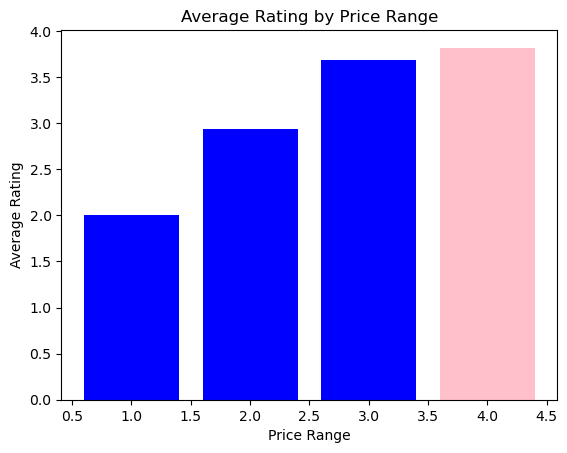

In [33]:
from matplotlib import pyplot as pt 
avg_rating_by_price_range = data.groupby('Price range')['Aggregate rating'].mean()
highest_avg_rating_color = avg_rating_by_price_range.idxmax()
pt.bar(avg_rating_by_price_range.index, avg_rating_by_price_range,color='blue')
pt.bar(highest_avg_rating_color, avg_rating_by_price_range[highest_avg_rating_color], color='pink')
pt.xlabel('Price Range')
pt.ylabel('Average Rating')
pt.title('Average Rating by Price Range')
pt.show()

In [34]:
#Feature Engineering

In [35]:
#Extract Additional Features 

In [36]:
data['Restaurant Name Length']= data['Restaurant Name'].apply(len)
data['Address length'] = data['Address'].apply(len)
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Restaurant Name Length,Address length
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,No,No,No,3,4.8,Dark Green,Excellent,314,16,71
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,No,No,No,3,4.5,Dark Green,Excellent,591,16,67
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,No,No,No,4,4.4,Green,Very Good,270,22,56
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,4,4.9,Dark Green,Excellent,365,4,70
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,No,No,No,4,4.8,Dark Green,Excellent,229,11,64


In [37]:
#Create New Features

In [38]:
data['Has Table Booking'] = np.where(data['Has Table booking'] == 'Yes', 1, 0)
data['Has Online Delivery'] = np.where(data['Has Online delivery'] == 'Yes', 1, 0)
data.head()


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Restaurant Name Length,Address length,Has Table Booking,Has Online Delivery
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,No,3,4.8,Dark Green,Excellent,314,16,71,1,0
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,No,3,4.5,Dark Green,Excellent,591,16,67,1,0
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,No,4,4.4,Green,Very Good,270,22,56,1,0
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,4,4.9,Dark Green,Excellent,365,4,70,0,0
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,No,4,4.8,Dark Green,Excellent,229,11,64,1,0
